In [2]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')



In [4]:
# ▶ pd.set option
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)  

# ▶ Data read
df = pd.read_csv(r"reference\step3_practice\ch01_Water_Circulation_System_설비예지보전\chapter01_df.csv", sep=";")
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


In [5]:
# ▶ Data 형태 확인
# ▶ 1063 row, 11 col로 구성됨
print('df :', df.shape)

df : (1063, 11)


In [6]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             1063 non-null   object 
 1   Accelerometer1RMS    1063 non-null   float64
 2   Accelerometer2RMS    1063 non-null   float64
 3   Current              1063 non-null   float64
 4   Pressure             1063 non-null   float64
 5   Temperature          1063 non-null   float64
 6   Thermocouple         1063 non-null   float64
 7   Voltage              1063 non-null   float64
 8   Volume Flow RateRMS  1063 non-null   float64
 9   anomaly              1063 non-null   float64
 10  changepoint          1063 non-null   float64
dtypes: float64(10), object(1)
memory usage: 91.5+ KB


In [7]:
# ▶ Null 값 확인
print(df.isnull().sum())

datetime               0
Accelerometer1RMS      0
Accelerometer2RMS      0
Current                0
Pressure               0
Temperature            0
Thermocouple           0
Voltage                0
Volume Flow RateRMS    0
anomaly                0
changepoint            0
dtype: int64


In [8]:
# ▶ Outlier 확인
df.describe()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,0.027663,0.040037,1.195240,0.048541,67.895174,24.265096,229.924824,31.472275,0.313264,0.003763
std,0.000333,0.001086,7.113407,0.270689,0.695198,0.021573,13.259556,1.314535,0.464039,0.061256
min,0.026455,0.036972,0.394058,-0.929070,66.201900,24.217000,0.580776,28.040000,0.000000,0.000000
25%,0.027434,0.039276,0.753505,0.054711,67.412450,24.252950,223.570000,31.039050,0.000000,0.000000
50%,0.027674,0.040098,1.002720,0.054711,67.955000,24.267200,230.634000,32.000000,0.000000,0.000000
75%,0.027892,0.040828,1.194580,0.054711,68.515500,24.277450,236.960000,32.038900,1.000000,0.000000
max,0.028554,0.043122,232.734000,1.038490,69.098200,24.332300,254.125000,33.000000,1.000000,1.000000


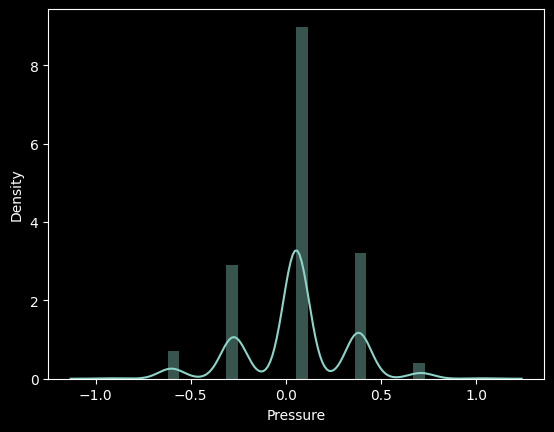

In [9]:
# ▶ Outlier 확인(음수값 필드), pressure
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Pressure']);

In [10]:
# ▶ Anomaly 및 Change Point 확인
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


In [11]:
# ▶ Anomaly 및 Change Point 확인 (1) - 'anomaly'
# ▶ Target ratio(%) 확인
pd.DataFrame({"count":df['anomaly'].value_counts(),
              "ratio(%)":df['anomaly'].value_counts(normalize=True)*100})

,count,ratio(%)
anomaly,,
0.0,730,68.673565
1.0,333,31.326435


In [12]:
# ▶ Anomaly 및 Change Point 확인 (2) - 'chagepoint'
# ▶ Target ratio(%) 확인
pd.DataFrame({"count":df['changepoint'].value_counts(),"ratio(%)":df['changepoint'].value_counts(normalize=True)*100})

,count,ratio(%)
changepoint,,
0.0,1059,99.623706
1.0,4,0.376294


In [13]:
# ▶ data split
df_anomaly = df[df['anomaly']==1]
df_change = df[df['changepoint']==1]
df_normal  = df[df['changepoint']==0]

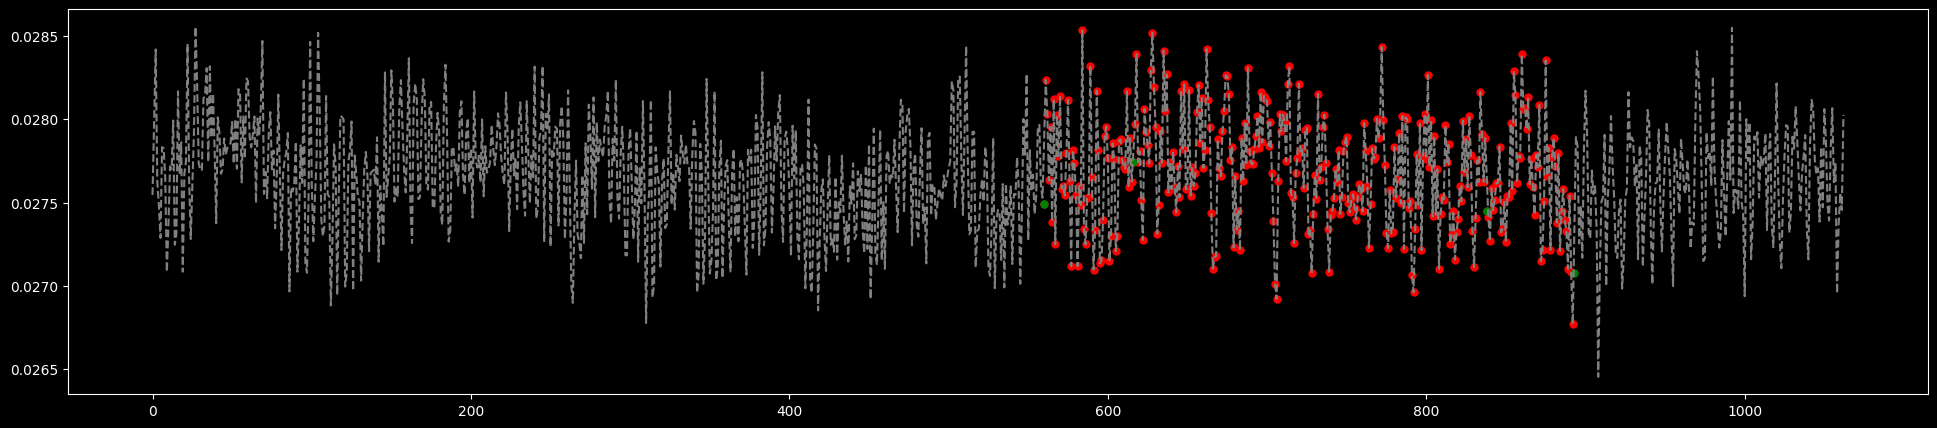

In [14]:
# ▶ Accelerometer1RMS Trend analysis
plt.figure(figsize=(24,5))
plt.plot(df_anomaly.index, df_anomaly['Accelerometer1RMS'], 'o', color='red', markersize=5);
plt.plot(df_change.index, df_change['Accelerometer1RMS'], 'o', color='green', markersize=5);
plt.plot(df_normal.index, df_normal['Accelerometer1RMS'], linestyle='--', color='grey');

In [15]:
df.columns

Index(['datetime', 'Accelerometer1RMS', 'Accelerometer2RMS', 'Current',
       'Pressure', 'Temperature', 'Thermocouple', 'Voltage',
       'Volume Flow RateRMS', 'anomaly', 'changepoint'],
      dtype='object')

In [16]:
df.columns[1:8], len(df.columns[1:8])

(Index(['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure',
        'Temperature', 'Thermocouple', 'Voltage'],
       dtype='object'),
 7)

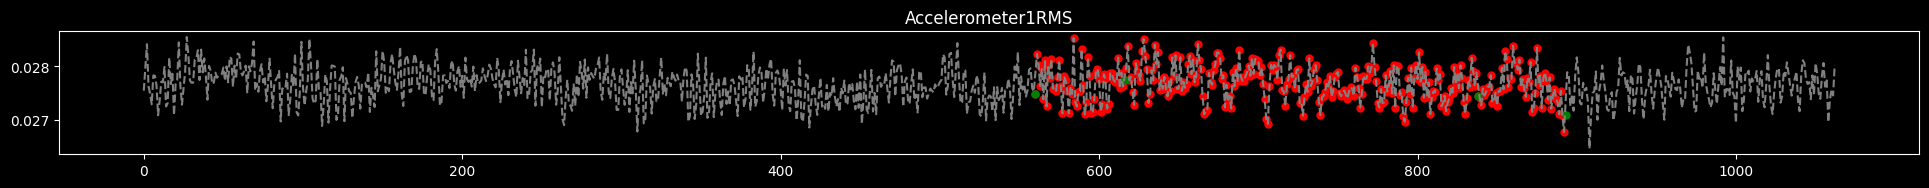

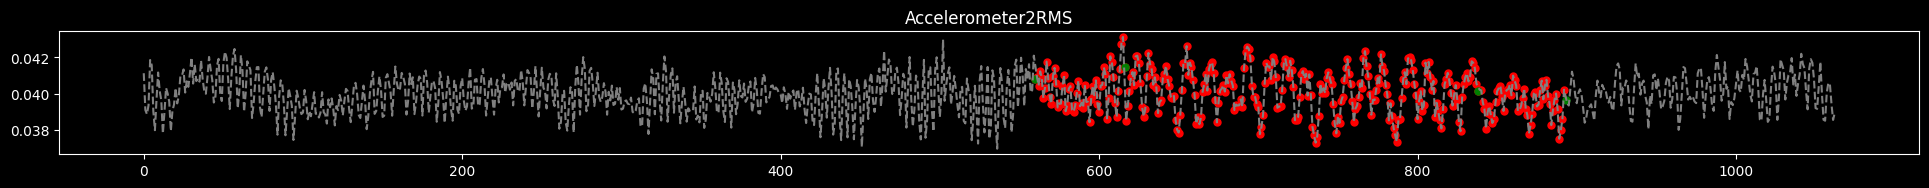

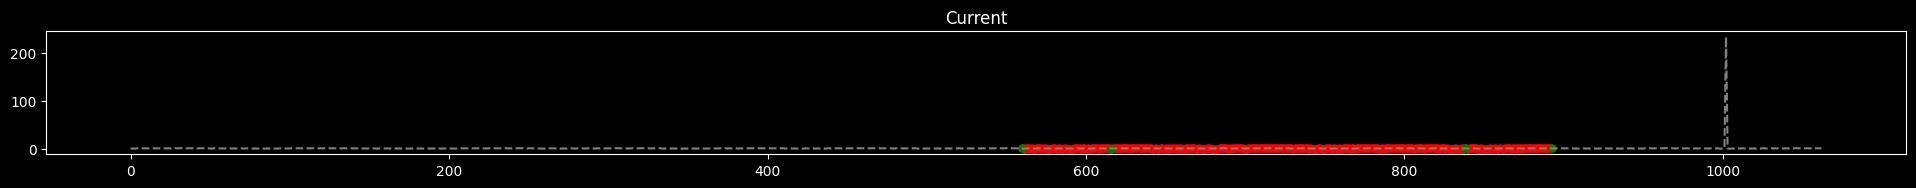

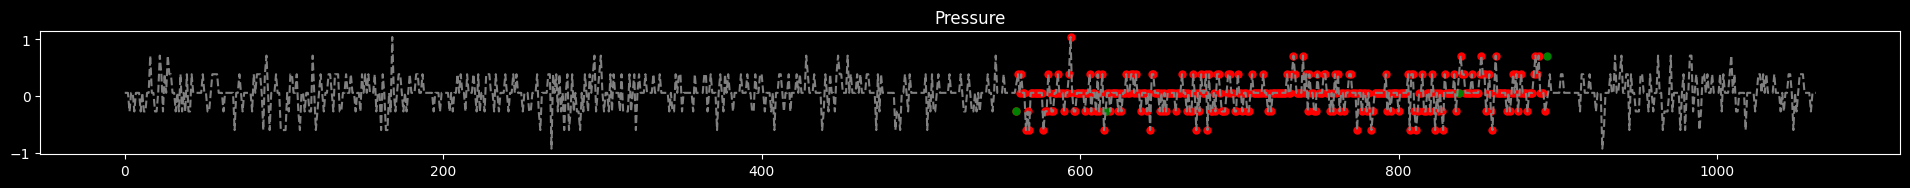

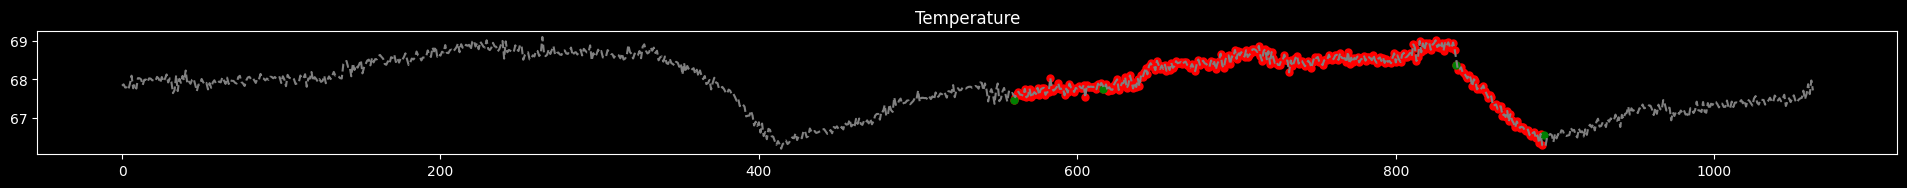

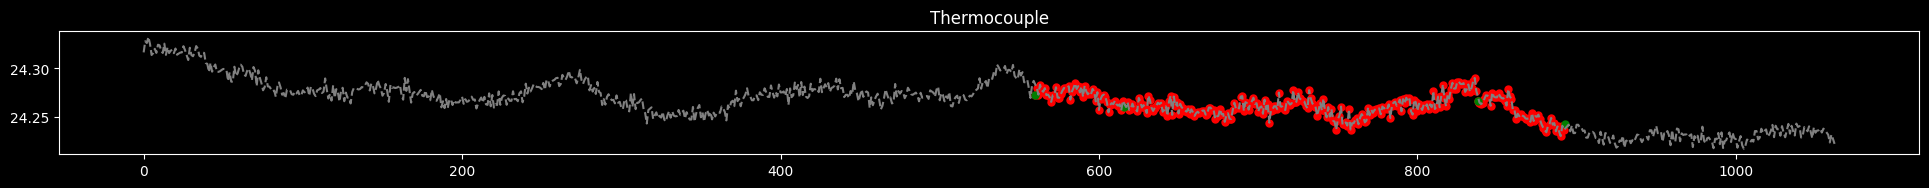

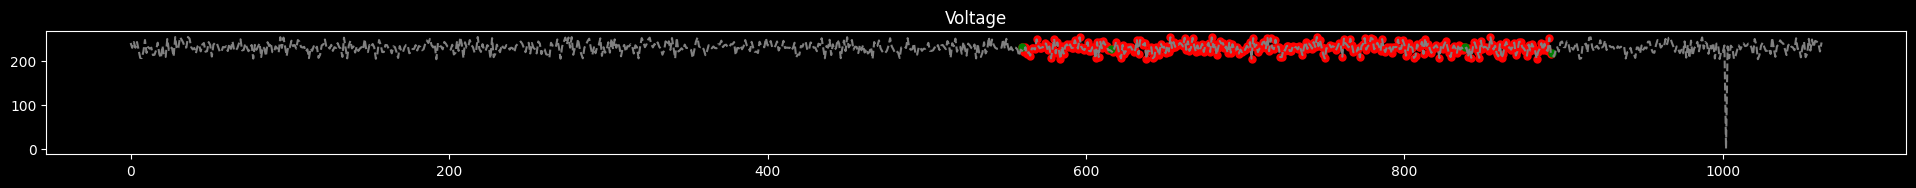

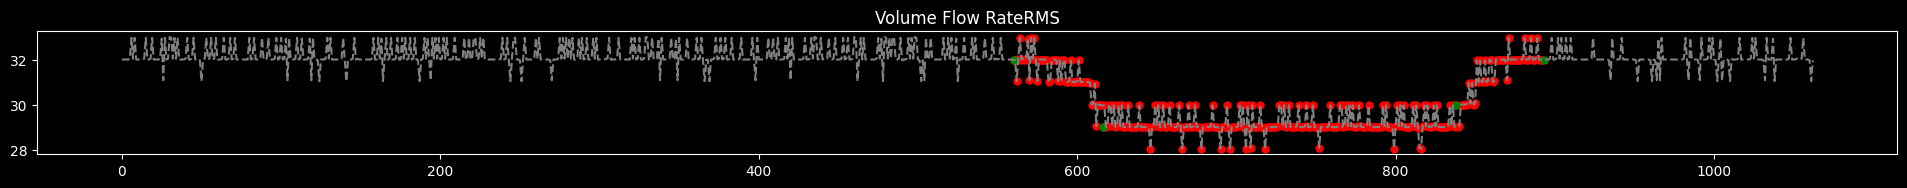

In [17]:
# ▶ for문 활용 시계열 센서 데이터 시각화
# ▶ 단일 변수로는 특별히 이상을 탐지하기 어려워 보임

for v, i in  enumerate(df.columns[1:9]) :
  plt.figure(figsize=(24,15))
  plt.subplot(8, 1, v+1)
  plt.plot(df_anomaly.index, df_anomaly[i], 'o', color='red', markersize=5);
  plt.plot(df_change.index, df_change[i], 'o', color='green', markersize=5);
  plt.plot(df_normal.index, df_normal[i], linestyle='--', color='grey');
  plt.title(i)

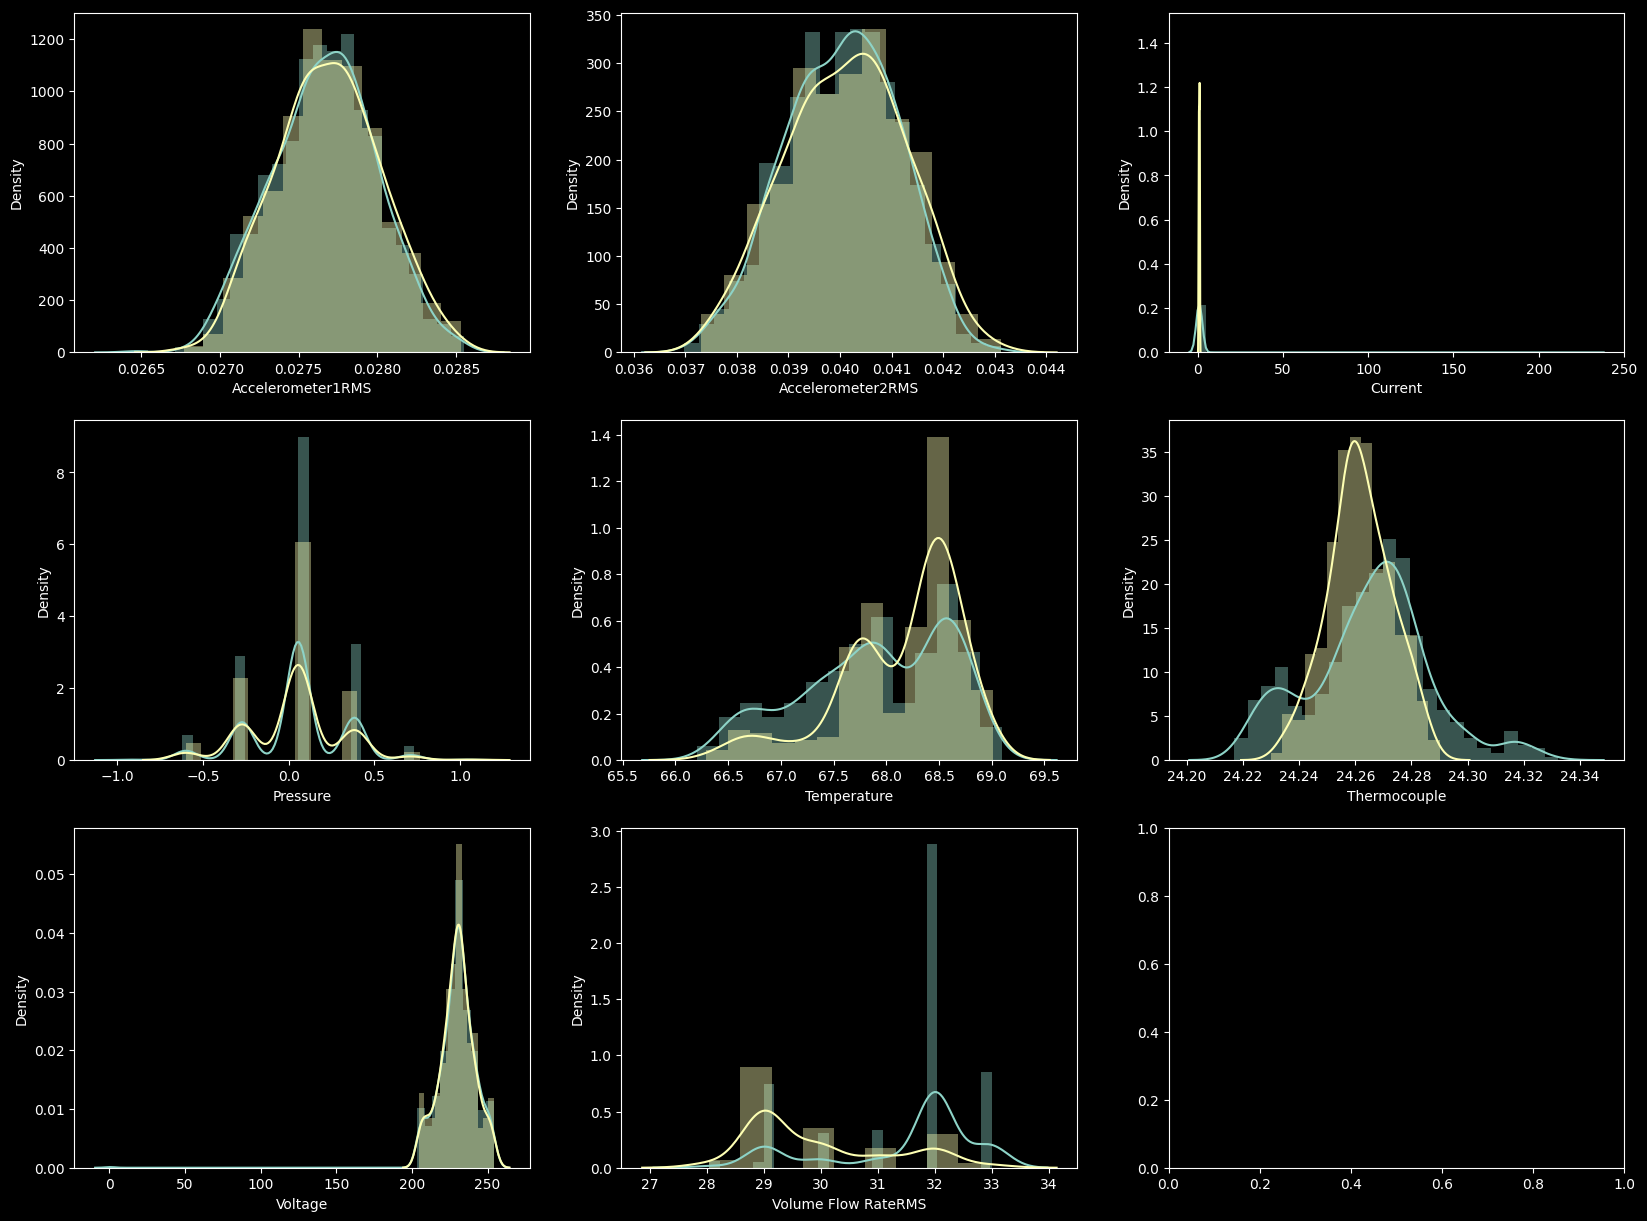

In [18]:
# ▶ for문 활용 시계열 센서 데이터 분포 시각화
col_n = 3
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(df.columns[1:9]):
    sns.distplot(df_normal[col], ax=ax[int(i/col_n),int(i%col_n)])
    sns.distplot(df_anomaly[col], ax=ax[int(i/col_n),int(i%col_n)])

In [19]:
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


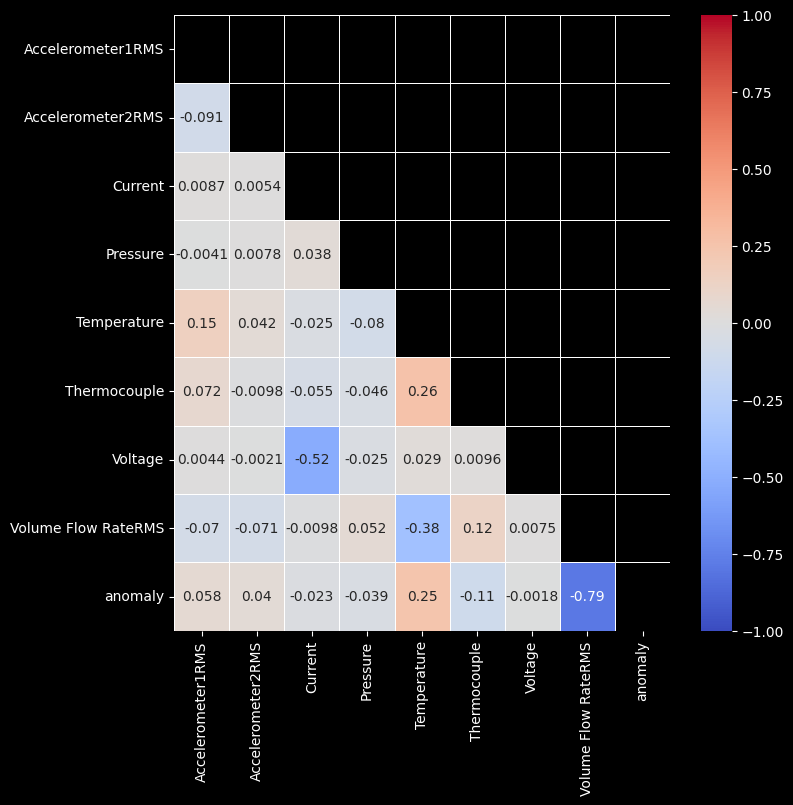

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ 분석에 필요한 column만 선택
df_corr = df.iloc[:,1:-1]

# ▶ corr() 활용, numerical value 상관관계 확인 
fig = plt.figure(figsize=(8,8))
df_num = df_corr.corr()
sns.heatmap(df_num, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', linewidths=.5,mask=np.triu(df_num.corr()));

In [21]:
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


In [22]:
# ▶ Train-Test Set split
from sklearn.model_selection import train_test_split

X=df.drop(['datetime', 'anomaly', 'changepoint'], axis=1)
Y=df['anomaly']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=123)

print(f'x_train shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape : (744, 8)
x_test shape : (319, 8)
y_train shape : (744,)
y_test shape : (319,)


In [23]:
# ▶ Train data Target ratio 확인
pd.Series(y_train).value_counts(normalize=True)

anomaly
0.0    0.686828
1.0    0.313172
Name: proportion, dtype: float64

In [24]:
# ▶ Test data Target ratio 확인
pd.Series(y_test).value_counts(normalize=True)

anomaly
0.0    0.68652
1.0    0.31348
Name: proportion, dtype: float64

In [25]:
from sklearn.ensemble import IsolationForest
# ▶ Model 학습 및 예측
# - n_estimators : 나무의 개수 (※ default 100)
# - max_samples : 샘플링 데이터 개수 (※ 정수, 실수(0~1), 전체 데이터 개수 or 256 중 작은 수)
# - contamination : 전체 데이터에서 이상치의 비율, 이 비율에 따라 이상치로 판단하기 위한 score의 threshold를 정의
# - max_features : 학습 시 사용할 Feature (※ default 1, 모두 사용)

clf = IsolationForest(max_samples=200, contamination = 0.30, random_state=42)
clf.fit(x_train)

y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

In [26]:
# ▶ 평가를 위해 다시 라벨링
y_pred_train = np.where(y_pred_train==-1, 1, 0)
y_pred_test = np.where(y_pred_test==-1, 1, 0)

In [27]:
y_pred_train[0:5], y_pred_test[0:5]

(array([0, 0, 0, 1, 0]), array([1, 0, 0, 0, 0]))

In [28]:
# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.71      0.72      0.72       511
         1.0       0.37      0.35      0.36       233

    accuracy                           0.61       744
   macro avg       0.54      0.54      0.54       744
weighted avg       0.60      0.61      0.61       744

-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69       219
         1.0       0.32      0.33      0.33       100

    accuracy                           0.57       319
   macro avg       0.51      0.51      0.51       319
weighted avg       0.58      0.57      0.57       319



In [29]:
# ▶ prediction과 Score 비교
# ▶ 음수 값일 수록 Outlier일 확률이 큼
y_pred_train[0:5], clf.decision_function(x_train)[0:5]

(array([0, 0, 0, 1, 0]),
 array([ 0.0256254 ,  0.03642322,  0.01464554, -0.06354214,  0.03496935]))

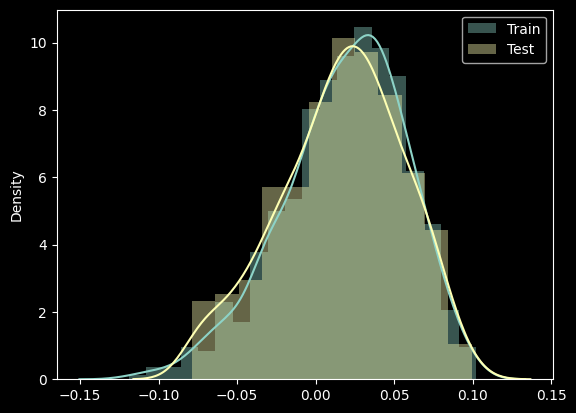

In [30]:
# ▶ 분포 시각화를 통해 Threshold 조정 (Train set/Test set)
sns.distplot( clf.decision_function(x_train), label='Train');
sns.distplot( clf.decision_function(x_test), label="Test");
plt.legend();

In [31]:
# ▶ Score 변수 할당
y_pred_train_score =  clf.decision_function(x_train)
y_pred_test_score = clf.decision_function(x_test)

# ▶ Threshold 조정
y_pred_train = np.where(y_pred_train_score < 0.05, 1, 0)
y_pred_test = np.where(y_pred_test_score < 0.05, 1, 0)

In [32]:
# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.78      0.24      0.37       511
         1.0       0.34      0.85      0.48       233

    accuracy                           0.43       744
   macro avg       0.56      0.55      0.43       744
weighted avg       0.64      0.43      0.41       744

-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.21      0.32       219
         1.0       0.32      0.82      0.46       100

    accuracy                           0.40       319
   macro avg       0.52      0.51      0.39       319
weighted avg       0.59      0.40      0.36       319



In [33]:
pd.Series(y_pred_train).value_counts()

1    585
0    159
Name: count, dtype: int64

In [34]:
pd.Series(y_pred_test).value_counts()

1    256
0     63
Name: count, dtype: int64